# COVID-19 Prediction with Machine Learning 
### Data Description
For developing this application we need some data that need to be scrapped from website
1. We need statewise number of confirmed cases,death cases and cured cases,we can scrap this data from kaggle.com using python
2. We also need current status and number of testing in the various states,we can get this data also from kaggle.com

### Objective
#### Predicting Covid-19 using Machine Learning model
We will take a Covid-19 dataset and understand how the disease has spread across different states in India.We will perform some data visualization opreations on top of the dataset.We will also be implementing a linear regression algorithm to understand the number of active and recovered cases.
### Building Model
1. Data Collection
2. Data Cleaning and Preparation
3. Data visulization
4. Prediction using Linear Regression

### D.1. DATA COLLECTION
#### 1. Importing all essential python libraries

In [1]:
# importing important libraries
import pandas as pd  # pandas use for data analysis
import matplotlib.pyplot as plt  # for ploting 
import numpy as np # for numerical calulation
import seaborn as sns
import datetime as dt

#### 2. Loading covid-19 dataset set from kaggle.com

In [2]:
# loading the data
df=pd.read_csv('/Users/rudranimondal/Downloads/covid_19_india.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       7086 non-null   int64 
 1   Date                      7086 non-null   object
 2   Time                      7086 non-null   object
 3   State/UnionTerritory      7086 non-null   object
 4   ConfirmedIndianNational   7086 non-null   object
 5   ConfirmedForeignNational  7086 non-null   object
 6   Cured                     7086 non-null   int64 
 7   Deaths                    7086 non-null   int64 
 8   Confirmed                 7086 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 498.4+ KB


#### This dateset has 7086 rows and 8 columns with no NaN(Not a number) . As we can see 'Date' column is object datatype we need to convert it into datetime datatype, we can use parse_dates = [column_name].

In [4]:
df=pd.read_csv('/Users/rudranimondal/Downloads/covid_19_india.csv',parse_dates=['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       7086 non-null   int64         
 1   Date                      7086 non-null   datetime64[ns]
 2   Time                      7086 non-null   object        
 3   State/UnionTerritory      7086 non-null   object        
 4   ConfirmedIndianNational   7086 non-null   object        
 5   ConfirmedForeignNational  7086 non-null   object        
 6   Cured                     7086 non-null   int64         
 7   Deaths                    7086 non-null   int64         
 8   Confirmed                 7086 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 498.4+ KB


In [5]:
# First 5 data 
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


### D.2. DATA CLEANING AND PREPARATION
#### Some of the columns will not help in data manipulation . So we will delete some columns using drop command. And final table look like this, we have only 5 columns out of 8.

In [6]:
# keeping only required columns
df=df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], axis=1)
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  7086 non-null   datetime64[ns]
 1   State/UnionTerritory  7086 non-null   object        
 2   Cured                 7086 non-null   int64         
 3   Deaths                7086 non-null   int64         
 4   Confirmed             7086 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 276.9+ KB


In [8]:
# looking at latest date
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7081,2020-10-07,Telengana,177008,1189,204748
7082,2020-10-07,Tripura,22623,301,27545
7083,2020-10-07,Uttarakhand,43238,677,52329
7084,2020-10-07,Uttar Pradesh,370753,6153,420937
7085,2020-10-07,West Bengal,243743,5318,277049


#### From heatmap now we can confirm that this data has zero null values 

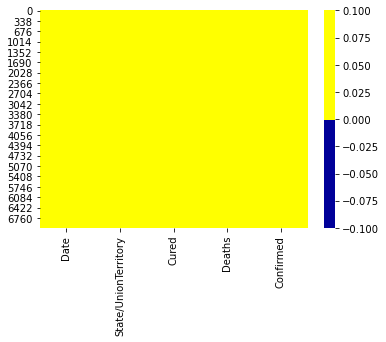

In [10]:
# Technique 1 using heatmap
import seaborn as sns
cols=df.columns[:] # upto 30 featurs(columns)
colors=['#000099','#ffff00']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors))

### D.3. VISUALIZATION
#### We will take the latest data and sort it with respect to  maximum number of confirmed cases.

In [47]:
# looking at current date
curr_date=df[df.Date=='2020-10-07']
curr_date

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7051,2020-10-07,Andaman and Nicobar Islands,3678,54,3912
7052,2020-10-07,Andhra Pradesh,672479,6052,729307
7053,2020-10-07,Arunachal Pradesh,7965,20,11007
7054,2020-10-07,Assam,155077,778,188902
7055,2020-10-07,Bihar,178395,925,190740
7056,2020-10-07,Chandigarh,11035,180,12707
7057,2020-10-07,Chhattisgarh,100551,1104,128893
7058,2020-10-07,Dadra and Nagar Haveli and Daman and Diu,3000,2,3103
7059,2020-10-07,Delhi,266935,5581,295236
7060,2020-10-07,Goa,31050,468,36238


In [48]:
# sorting data w.r.t. number of cases
max_confirmed_cases=curr_date.sort_values(by='Confirmed',ascending=False)
max_confirmed_cases

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7070,2020-10-07,Maharashtra,1179726,38717,1465911
7052,2020-10-07,Andhra Pradesh,672479,6052,729307
7066,2020-10-07,Karnataka,533074,9461,657705
7080,2020-10-07,Tamil Nadu,575212,9917,630408
7084,2020-10-07,Uttar Pradesh,370753,6153,420937
7059,2020-10-07,Delhi,266935,5581,295236
7085,2020-10-07,West Bengal,243743,5318,277049
7067,2020-10-07,Kerala,154092,884,242799
7075,2020-10-07,Odisha,210217,940,238003
7081,2020-10-07,Telengana,177008,1189,204748


#### Now we got the maximum number of confirmed cases , let's plot the graph using seaborn and matplotlib.

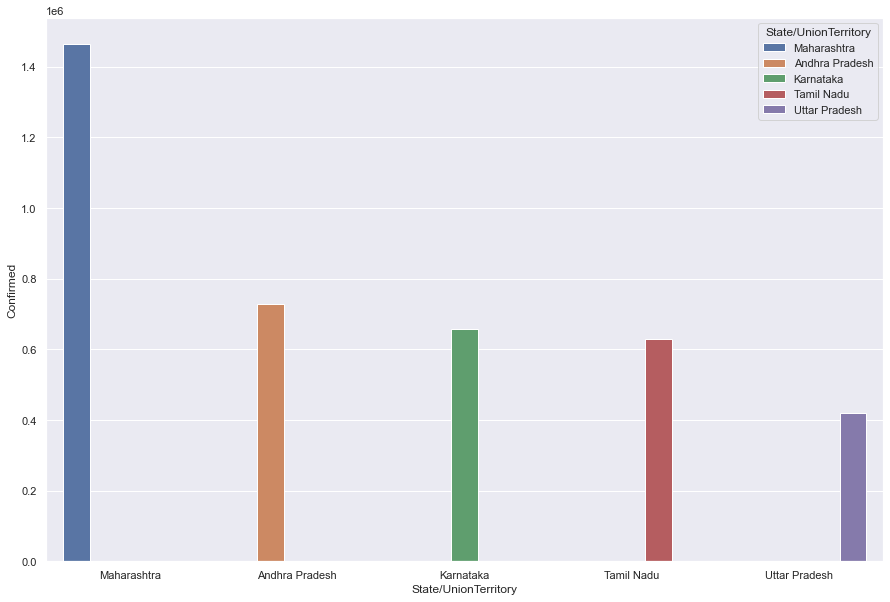

In [49]:
# Ploting(MAX no of cases)
top_states=max_confirmed_cases[0:5]
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x='State/UnionTerritory',y='Confirmed',data=top_states,hue='State/UnionTerritory')
plt.show()

#### By analysing , Maharashtra has maximum number of confirmed cases.
#### Now let's sort the data with respect to maximum number of Death cases and plot the graph.

In [50]:
# sorting data w.r.t. number of death cases
max_death_cases=curr_date.sort_values(by='Deaths',ascending=False)
max_death_cases

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7070,2020-10-07,Maharashtra,1179726,38717,1465911
7080,2020-10-07,Tamil Nadu,575212,9917,630408
7066,2020-10-07,Karnataka,533074,9461,657705
7084,2020-10-07,Uttar Pradesh,370753,6153,420937
7052,2020-10-07,Andhra Pradesh,672479,6052,729307
7059,2020-10-07,Delhi,266935,5581,295236
7085,2020-10-07,West Bengal,243743,5318,277049
7077,2020-10-07,Punjab,104355,3679,120016
7061,2020-10-07,Gujarat,125111,3519,145200
7069,2020-10-07,Madhya Pradesh,118039,2488,138668


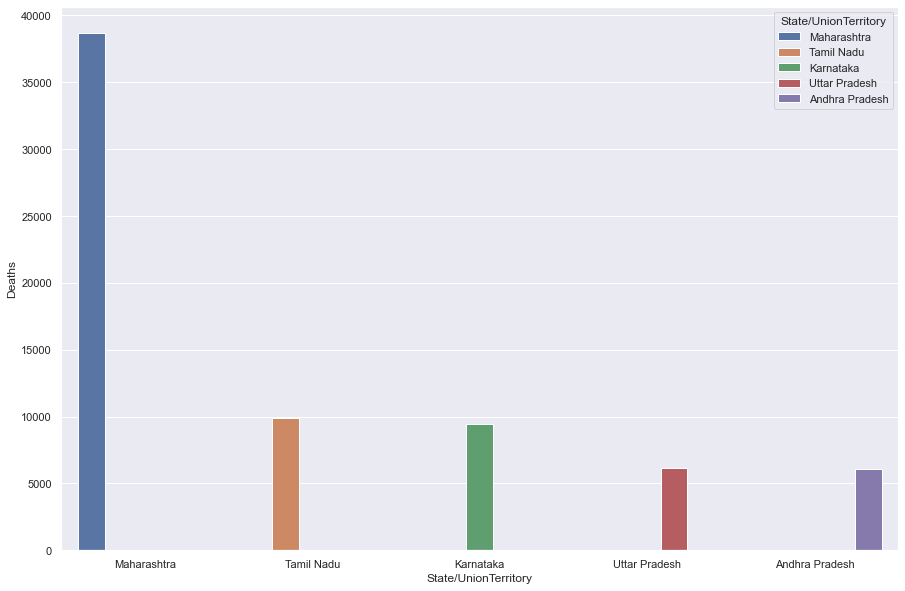

In [51]:
# Ploting(MAX no. of death)
top_death_cases=max_death_cases[0:5]
sns.set(rc={'figure.figsize':[15,10]})
sns.barplot(x='State/UnionTerritory',y='Deaths',data=top_death_cases,hue='State/UnionTerritory')
plt.show()

#### Sort the data with respect to maximum number of Cured cases and plot the graph.

In [52]:
# sorting data w.r.t. cured cases
cured_cases=curr_date.sort_values(by='Cured',ascending=False)
cured_cases

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7070,2020-10-07,Maharashtra,1179726,38717,1465911
7052,2020-10-07,Andhra Pradesh,672479,6052,729307
7080,2020-10-07,Tamil Nadu,575212,9917,630408
7066,2020-10-07,Karnataka,533074,9461,657705
7084,2020-10-07,Uttar Pradesh,370753,6153,420937
7059,2020-10-07,Delhi,266935,5581,295236
7085,2020-10-07,West Bengal,243743,5318,277049
7075,2020-10-07,Odisha,210217,940,238003
7055,2020-10-07,Bihar,178395,925,190740
7081,2020-10-07,Telengana,177008,1189,204748


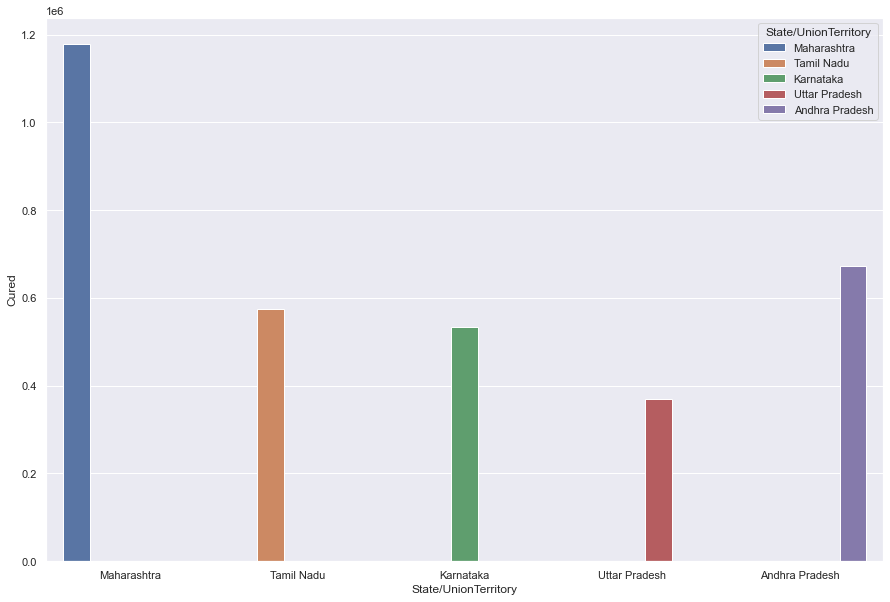

In [53]:
# Ploting for cured cases
top_cured_cases=cured_cases[0:5]
sns.set(rc={'figure.figsize':[15,10]})
sns.barplot(x='State/UnionTerritory',y='Cured',data=top_death_cases,hue='State/UnionTerritory')
plt.show()

In [11]:
# change the column name 
df=df.rename(columns={'State/UnionTerritory':'state'})
df.head()

,Date,state,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


### For Maharashtra
#### We will closely analyse Maharashtra as it has maximum number of confirmed cases.

In [12]:
# Closer analysis for Maharashtra
maha= df[df.state=='Maharashtra']
maha

,Date,state,Cured,Deaths,Confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
6930,2020-10-03,Maharashtra,1117720,37480,1416513
6965,2020-10-04,Maharashtra,1134555,37758,1430861
7000,2020-10-05,Maharashtra,1149603,38084,1443409
7035,2020-10-06,Maharashtra,1162585,38347,1453653


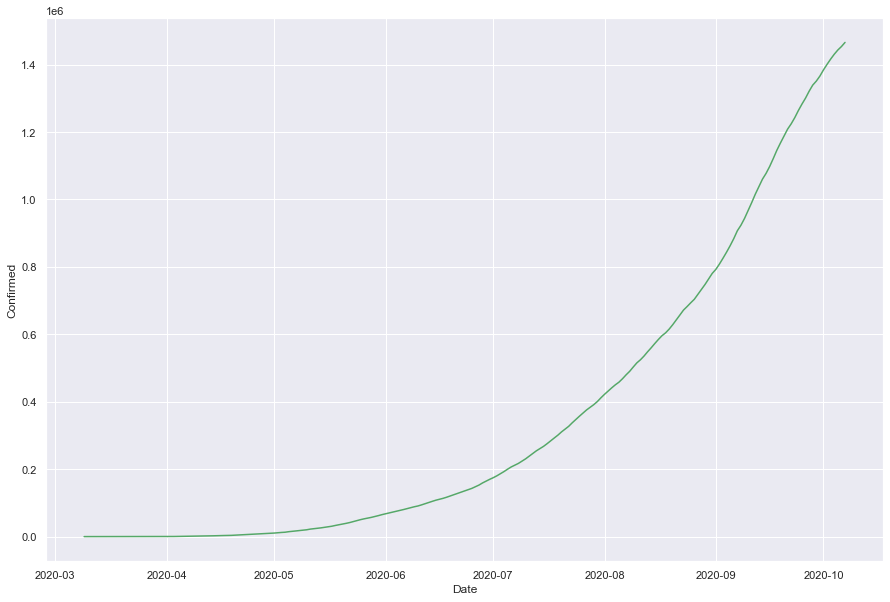

In [58]:
# Visulization confirmed cases in Maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Confirmed',data=maha,color='g')
plt.show()

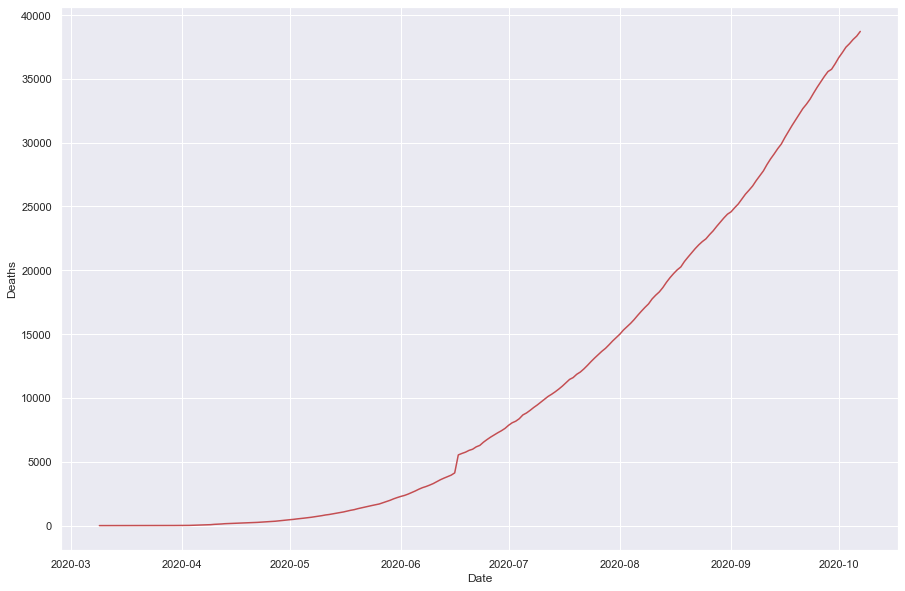

In [60]:
# Visuizating death cases in Maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Deaths',data=maha,color='r')
plt.show()

### For Kerala
#### Again we will closely analyse Kerala and plot the graph for it.

In [61]:
# Closer analysis for Kerala
k=df[df.state=='Kerala']
k

,Date,state,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
6927,2020-10-03,Kerala,135144,791,213499
6962,2020-10-04,Kerala,139620,813,221333
6997,2020-10-05,Kerala,144471,836,229886
7032,2020-10-06,Kerala,149111,859,234928


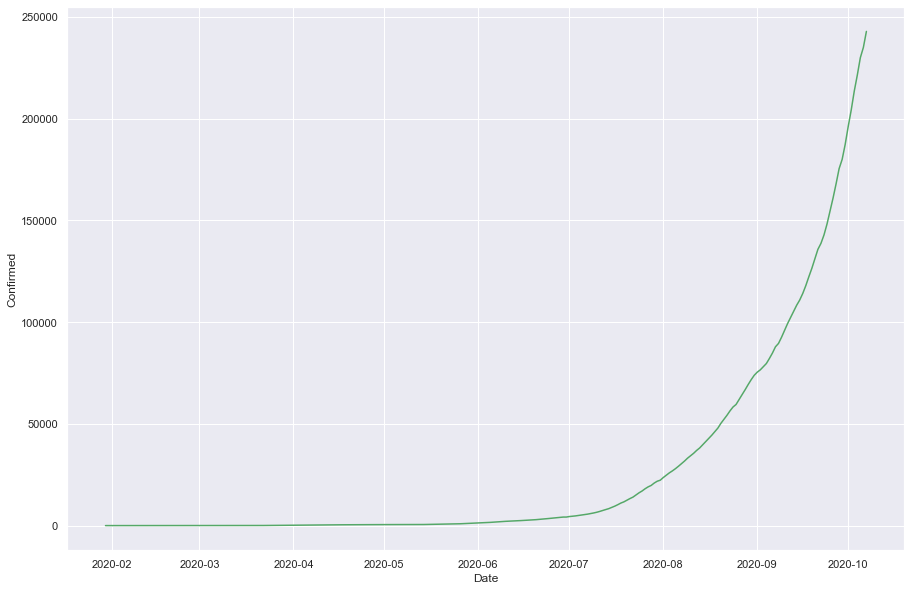

In [62]:
# Visulation of confirmed cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Confirmed',data=k,color='g')
plt.show()

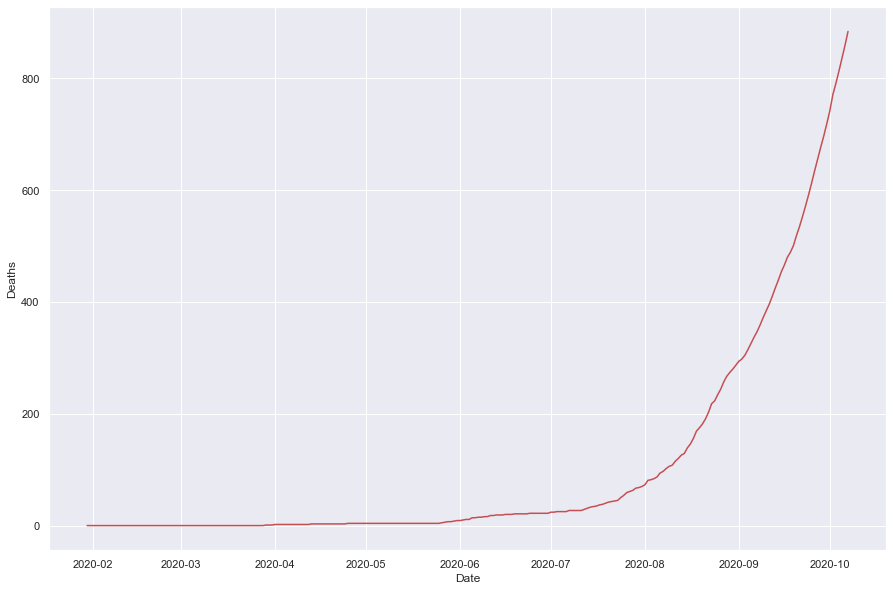

In [63]:
# Visulization of number of death cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Deaths',data=k,color='r')
plt.show()

#### We will closely analyse Jammu and Kashmir and plot the graph

In [64]:
# Closer analysis for jammu and kashmir
jk=df[df.state=='Jammu and Kashmir']
jk

,Date,state,Cured,Deaths,Confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
6924,2020-10-03,Jammu and Kashmir,59952,1212,77253
6959,2020-10-04,Jammu and Kashmir,61351,1231,78228
6994,2020-10-05,Jammu and Kashmir,62404,1242,79106
7029,2020-10-06,Jammu and Kashmir,63790,1252,79738


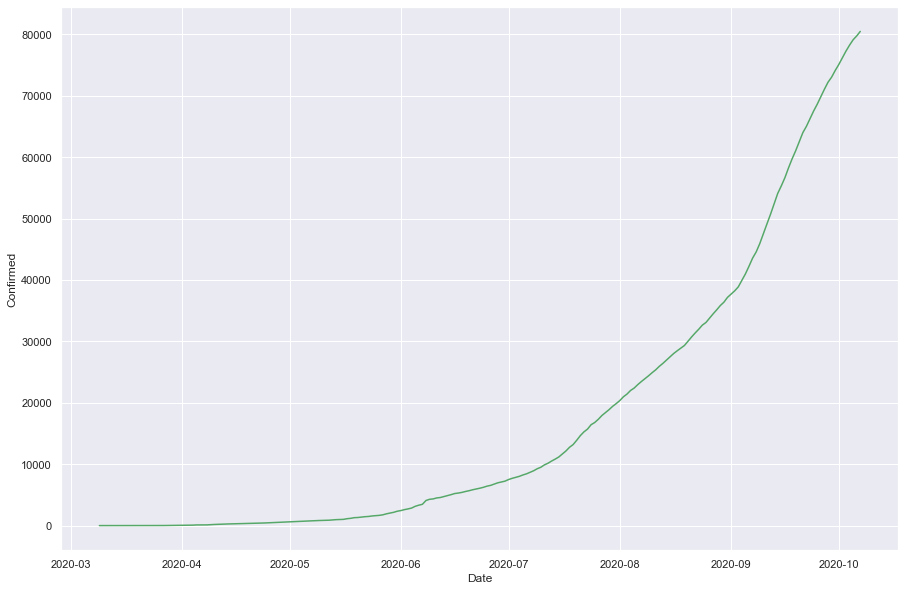

In [65]:
# Visulization of confirmed cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Confirmed',data=jk,color='g')
plt.show()

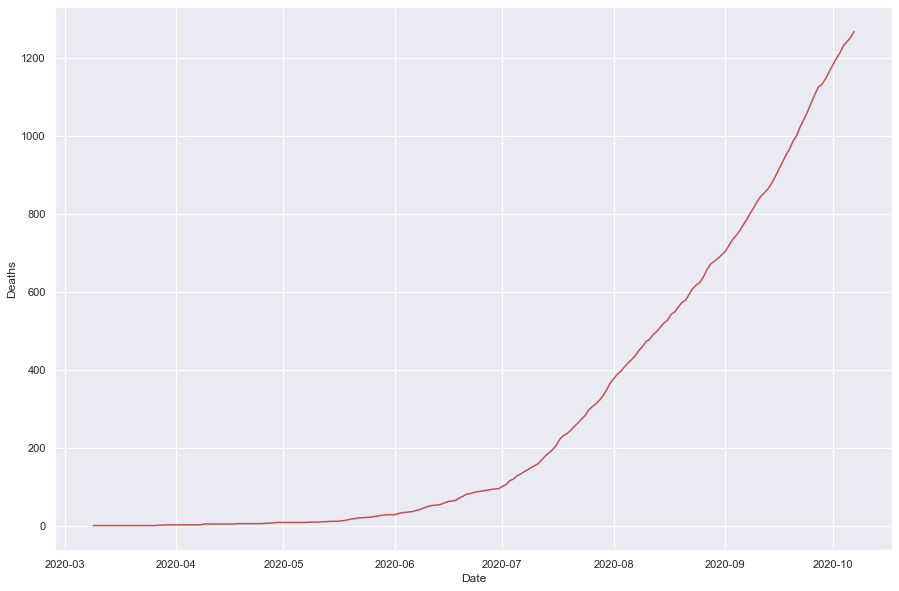

In [67]:
# Visulization for Death cases in Jammu and Kashmir
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='Date',y='Deaths',data=jk,color='r')
plt.show()

#### We are done with number of confirmed cases , Death cases and cured cases now we will take Statewise Testing details . For this we will load Testing Details csv file.

In [69]:
# Analysing Statewise details
# We will load another(Statewise Testing Details) csv file
tests=pd.read_csv('StatewiseTestingDetails.csv')
tests.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


#### We will sort the data with respect to maximum number of testing samples and plot it.

In [74]:
# Let's check latest data
test_latest=tests[tests.Date=='2020-10-07']
test_latest

,Date,State,TotalSamples,Negative,Positive
146,2020-10-07,Andaman and Nicobar Islands,65111.0,NaN,3935.0
346,2020-10-07,Andhra Pradesh,6283009.0,5548582,NaN
537,2020-10-07,Arunachal Pradesh,265870.0,245963,NaN
717,2020-10-07,Assam,3739086.0,NaN,NaN
918,2020-10-07,Bihar,7995594.0,NaN,NaN
1119,2020-10-07,Chandigarh,83413.0,70078,NaN
1313,2020-10-07,Chhattisgarh,1238699.0,NaN,NaN
1490,2020-10-07,Dadra and Nagar Haveli and Daman and Diu,68466.0,64888,3120.0
1684,2020-10-07,Delhi,3422473.0,NaN,NaN
1879,2020-10-07,Goa,265959.0,NaN,NaN


In [75]:
# sorting data w.r.t. cured(max test) cases
max_test_state=test_latest.sort_values(by='TotalSamples',ascending=False)
max_test_state

,Date,State,TotalSamples,Negative,Positive
6227,2020-10-07,Uttar Pradesh,11208621.0,NaN,NaN
918,2020-10-07,Bihar,7995594.0,NaN,NaN
5704,2020-10-07,Tamil Nadu,7957106.0,NaN,NaN
3830,2020-10-07,Maharashtra,7324188.0,5843699,1480489.0
346,2020-10-07,Andhra Pradesh,6283009.0,5548582,NaN
3087,2020-10-07,Karnataka,5524302.0,NaN,NaN
2081,2020-10-07,Gujarat,4806040.0,NaN,NaN
717,2020-10-07,Assam,3739086.0,NaN,NaN
4732,2020-10-07,Odisha,3569600.0,NaN,NaN
6636,2020-10-07,West Bengal,3523161.0,NaN,NaN


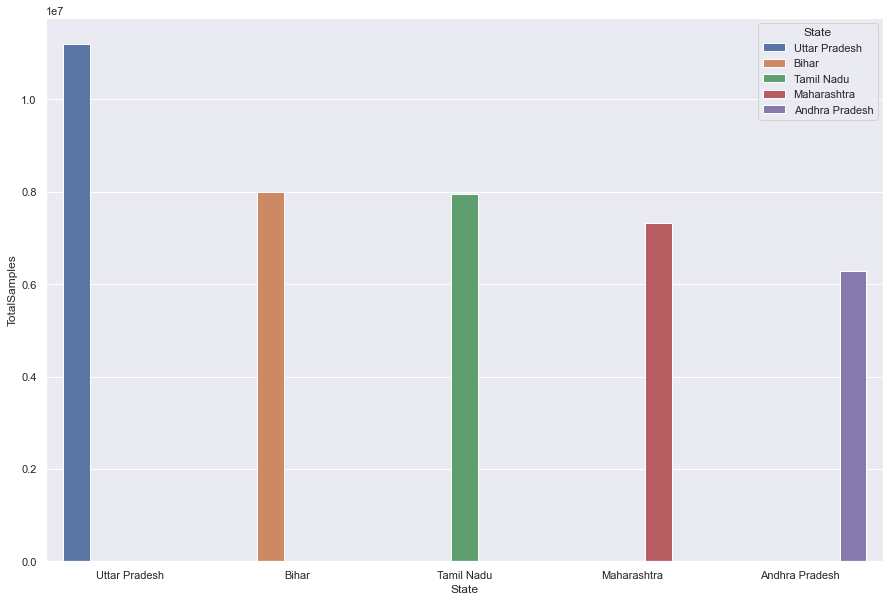

In [76]:
# ploting max test cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='State',y='TotalSamples',data=max_test_state[0:5],hue='State')
plt.show()

### D.4. PREDICTION USING LINEAR REGRESSION
### Linear Regression
#### Linear Regression is a machine learning algorithm based on Supervisd learning , it performs regression task. Here we will predict number of confirmed cases. So we will import Linear Regression module from sklearn library.

In [53]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [54]:
maha

,Date,state,Cured,Deaths,Confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14
...,...,...,...,...,...
6930,737701,Maharashtra,1117720,37480,1416513
6965,737702,Maharashtra,1134555,37758,1430861
7000,737703,Maharashtra,1149603,38084,1443409
7035,737704,Maharashtra,1162585,38347,1453653


#### We will convert the 'date'  column from datetime to ordinal so that it will be easy for prediction.

In [75]:
maha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 76 to 7070
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       213 non-null    int64 
 1   state      213 non-null    object
 2   Cured      213 non-null    int64 
 3   Deaths     213 non-null    int64 
 4   Confirmed  213 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.0+ KB


#### For prediction we need to define Independent and Dependent variable. Indepent variables (also referred as Features) are input for the process that is being analyse. Dependent variables are the output of the process. Here we will take Indepentent as 'Data' and Dependent  as 'Confirmed' column.

In [56]:
# getting indepentent(x) and dependent(y) variable
x=maha['Date']
y=maha['Confirmed']

#### The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it two subsets : Train and Test sets . Train set used to fit the machine learning model. Test set used to evaluate the fit machine learning model. Here we import train_test_split module from sklearn library and split the data into Train sets which is 70% and test set 30%.

In [69]:
# spliting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#### Then we will fit the model using .fit() method , here we need to reshape the x train and y train data.

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [72]:
maha.tail()

,Date,state,Cured,Deaths,Confirmed
6930,737701,Maharashtra,1117720,37480,1416513
6965,737702,Maharashtra,1134555,37758,1430861
7000,737703,Maharashtra,1149603,38084,1443409
7035,737704,Maharashtra,1162585,38347,1453653
7070,737705,Maharashtra,1179726,38717,1465911


#### Prediction 
#### Here we will predict the number of confirmed cases by giving input Date.

In [73]:
lr.predict(np.array([[737700]]))

array([[958363.39030457]])

#### Accuracy
#### Here we will find the accuracy that how much it predicting on test set

In [74]:
lr.score(np.array(X_test).reshape(-1,1),np.array(y_test).reshape(-1,1))

0.8086590085623142

#### This Linear model gives accuracy around 80% which is correct but we can improve this model from 80% to over 90% accuracy by Feature engineering , Feature selection, Ensemble learning Algorithms and by adjusting hyperparameters and we can use other regression models for predictions , but all these are out of the scope of this Mini Project.